In [7]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [8]:
# Reading the data
dataset = pd.read_csv("Dataset/isbsg10.arff.csv")
dataset.head()

,Data_Quality,UFP,IS,DP,LT,PPL,CA,FS,RS,Recording_Method,FPS,Effort
0,1,1,1,1,1,1,1,225,1,1,1,1856
1,1,1,1,1,1,2,1,599,2,1,2,10083
2,1,1,1,2,1,2,1,333,2,1,3,5208
3,1,1,2,3,2,3,1,748,2,2,3,1518
4,1,1,1,1,1,4,1,158,1,1,4,3376


In [9]:

x = np.array(dataset.drop(['Effort'],axis=1))
y = np.array(dataset['Effort'])

In [10]:
y.shape

(37,)

Scaling the data

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
x_scaled=scaler.fit_transform(x)
y=np.reshape(y,(37,1))
y=scaler.fit_transform(y)

 Splitting the dataset into training and testing set (80/20)

In [12]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state =30)

In [13]:
x_train

array([[0.        , 0.        , 0.33333333, 0.5       , 0.5       ,
        0.15384615, 0.        , 0.47852298, 0.33333333, 1.        ,
        0.75      ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ,
        0.        , 0.        , 0.32177845, 0.33333333, 0.        ,
        0.5       ],
       [1.        , 1.        , 1.        , 0.25      , 1.        ,
        0.92307692, 1.        , 0.11152977, 0.        , 0.66666667,
        0.75      ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.23076923, 0.        , 0.08590806, 0.        , 0.        ,
        0.75      ],
       [0.        , 0.        , 0.22222222, 0.5       , 0.5       ,
        0.15384615, 0.        , 1.        , 1.        , 0.33333333,
        0.5       ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ,
        0.        , 0.        , 0.06782216, 0.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , 0.        , 0.

 SVM Model

In [14]:
# SVM Model
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Train the model 
svr.fit(x_train, y_train.ravel())

SVR(C=1000.0, gamma=0.1)

Predicting the Close Price

In [15]:
# Predicting the target values of the test set
y_pred = svr.predict(x_test)

In [18]:
y_pred=np.reshape(y_pred,(8,1))
y_test=np.reshape(y_test,(8,1))

Finding the RMSE and MAPE

Definition of Mean Absolute Percentage Error

In [19]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [20]:

def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-svr.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.037120457636720394

RMSE:
 0.19266670090267388

MAPE:
 inf

SMAPE:
 106.62

 Adj R2 score:
 0.8262647625929455


C:\Users\sachi\AppData\Local\Temp\ipykernel_8372\4261787059.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


In [21]:

y_pred=scaler.inverse_transform(y_pred)

In [22]:


y_test=scaler.inverse_transform(y_test)

In [24]:

y_test=np.reshape(y_test,(8,))
y_pred=np.reshape(y_pred,(8,))

In [25]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted Effort':y_pred})
print(dfr)

   Actual Effort  Predicted Effort
0          441.0        208.349631
1         1273.0       2157.117950
2         3272.0       1615.775194
3         5170.0       6664.744016
4           87.0        -95.095986
5         1530.0       7473.932650
6         1772.0      -2396.742960
7         3268.0       1614.852077


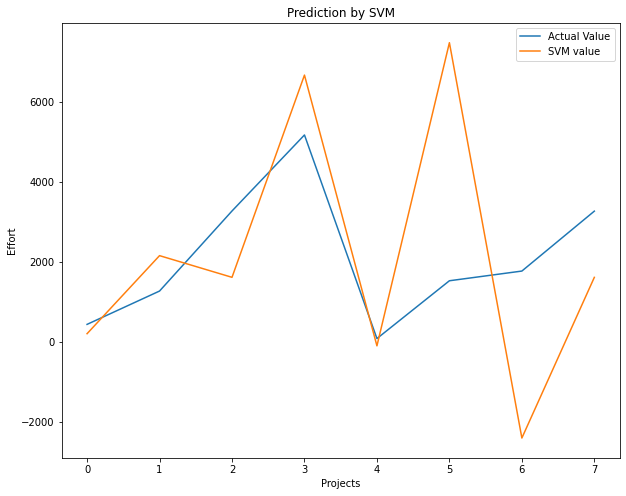

In [26]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="SVM value")
plt.title("Prediction by SVM")
plt.xlabel("Projects")
plt.ylabel("Effort")
plt.legend()
plt.show()